In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


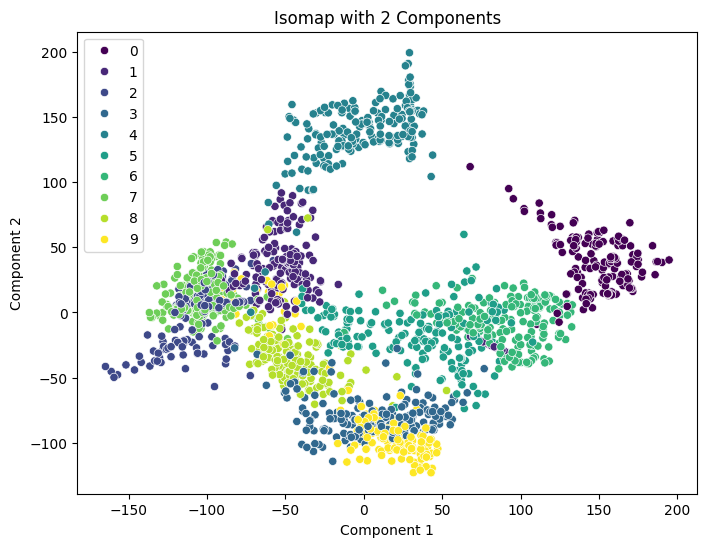

In [4]:
# Apply Isomap with 2 components for visualization
isomap_2d = Isomap(n_components=2)
X_isomap_2d = isomap_2d.fit_transform(X)

# Plot the 2D Isomap projection
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_isomap_2d[:, 0], y=X_isomap_2d[:, 1], hue=y, palette="viridis", legend="full")
plt.title("Isomap with 2 Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


In [5]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    "Gaussian Naive Bayes": GaussianNB(),
    "SVC": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each classifier on the raw dataset
results_raw = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_raw[name] = accuracy
    print(f"Accuracy of {name} on raw data: {accuracy:.4f}")


Accuracy of Gaussian Naive Bayes on raw data: 0.8519
Accuracy of SVC on raw data: 0.9870
Accuracy of Random Forest on raw data: 0.9759
Accuracy of KNN on raw data: 0.9926


In [6]:
# Dictionary to store accuracy results for each combination of algorithm and Isomap component count
results_isomap = {}

# Loop through each number of components and train models on Isomap-reduced data
for n_components in [2, 3, 4, 5]:
    # Apply Isomap with n_components
    isomap = Isomap(n_components=n_components)
    X_isomap = isomap.fit_transform(X)

    # Split the reduced data into train and test sets
    X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_isomap, y, test_size=0.3, random_state=42)

    # Evaluate each classifier on the Isomap-reduced dataset
    for name, clf in classifiers.items():
        clf.fit(X_train_iso, y_train_iso)
        y_pred_iso = clf.predict(X_test_iso)
        accuracy_iso = accuracy_score(y_test_iso, y_pred_iso)

        # Store the accuracy in the results dictionary
        results_isomap[(name, n_components)] = accuracy_iso
        print(f"Accuracy of {name} with Isomap (n_components={n_components}): {accuracy_iso:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Accuracy of Gaussian Naive Bayes with Isomap (n_components=2): 0.7148
Accuracy of SVC with Isomap (n_components=2): 0.7759
Accuracy of Random Forest with Isomap (n_components=2): 0.8056
Accuracy of KNN with Isomap (n_components=2): 0.8222


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Accuracy of Gaussian Naive Bayes with Isomap (n_components=3): 0.8500
Accuracy of SVC with Isomap (n_components=3): 0.9259
Accuracy of Random Forest with Isomap (n_components=3): 0.9481
Accuracy of KNN with Isomap (n_components=3): 0.9500


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Accuracy of Gaussian Naive Bayes with Isomap (n_components=4): 0.9000
Accuracy of SVC with Isomap (n_components=4): 0.9611
Accuracy of Random Forest with Isomap (n_components=4): 0.9722
Accuracy of KNN with Isomap (n_components=4): 0.9741


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Accuracy of Gaussian Naive Bayes with Isomap (n_components=5): 0.9444
Accuracy of SVC with Isomap (n_components=5): 0.9815
Accuracy of Random Forest with Isomap (n_components=5): 0.9796
Accuracy of KNN with Isomap (n_components=5): 0.9852


In [7]:
# Display results for raw data
print("\nAccuracy on Raw Data (64 features):")
for name, accuracy in results_raw.items():
    print(f"{name}: {accuracy:.4f}")

# Display results for Isomap-reduced data
print("\nAccuracy on Isomap-Reduced Data:")
for (name, n_components), accuracy in results_isomap.items():
    print(f"{name} with Isomap (n_components={n_components}): {accuracy:.4f}")



Accuracy on Raw Data (64 features):
Gaussian Naive Bayes: 0.8519
SVC: 0.9870
Random Forest: 0.9759
KNN: 0.9926

Accuracy on Isomap-Reduced Data:
Gaussian Naive Bayes with Isomap (n_components=2): 0.7148
SVC with Isomap (n_components=2): 0.7759
Random Forest with Isomap (n_components=2): 0.8056
KNN with Isomap (n_components=2): 0.8222
Gaussian Naive Bayes with Isomap (n_components=3): 0.8500
SVC with Isomap (n_components=3): 0.9259
Random Forest with Isomap (n_components=3): 0.9481
KNN with Isomap (n_components=3): 0.9500
Gaussian Naive Bayes with Isomap (n_components=4): 0.9000
SVC with Isomap (n_components=4): 0.9611
Random Forest with Isomap (n_components=4): 0.9722
KNN with Isomap (n_components=4): 0.9741
Gaussian Naive Bayes with Isomap (n_components=5): 0.9444
SVC with Isomap (n_components=5): 0.9815
Random Forest with Isomap (n_components=5): 0.9796
KNN with Isomap (n_components=5): 0.9852


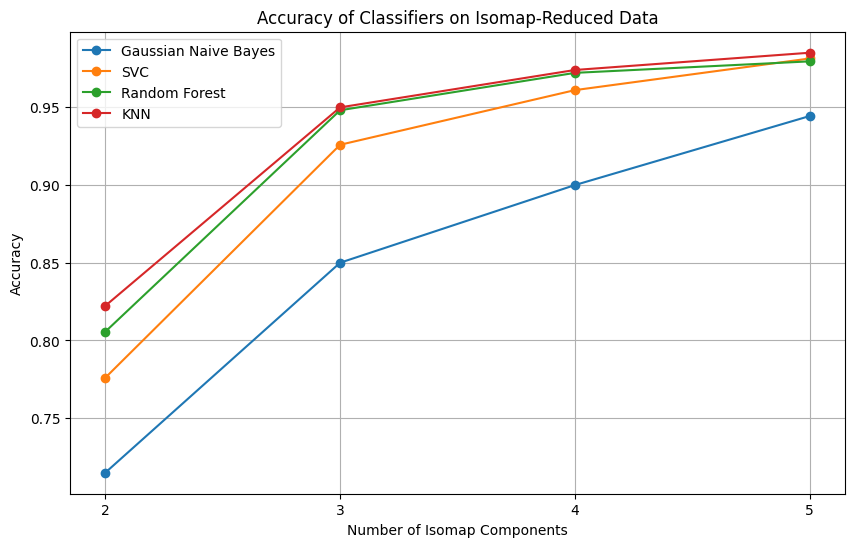

In [8]:
import matplotlib.pyplot as plt

# Sample data assuming we have `results_isomap` dictionary filled with accuracy scores
# Structure: results_isomap = {(classifier_name, n_components): accuracy_score, ...}

# Define n_components list and classifiers (assuming these match previous step results)
n_components_list = [2, 3, 4, 5]
classifier_names = ["Gaussian Naive Bayes", "SVC", "Random Forest", "KNN"]

# Initialize data structure to collect accuracy results by classifier and component count
accuracy_data = {name: [] for name in classifier_names}

# Populate accuracy_data from results_isomap
for n_components in n_components_list:
    for name in classifier_names:
        accuracy_data[name].append(results_isomap.get((name, n_components), 0))

# Plotting the results
plt.figure(figsize=(10, 6))
for name, accuracies in accuracy_data.items():
    plt.plot(n_components_list, accuracies, marker='o', label=name)

plt.title("Accuracy of Classifiers on Isomap-Reduced Data")
plt.xlabel("Number of Isomap Components")
plt.ylabel("Accuracy")
plt.xticks(n_components_list)
plt.legend()
plt.grid()
plt.show()
